In [ ]:
! pip install pyswarms

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.1/104.1 kB 4.4 MB/s eta 0:00:00


In [ ]:
# Import modules
import numpy as np
import matplotlib.pyplot as plt



# Import PySwarms
import pyswarms as ps
from pyswarms.utils.functions import single_obj as fx

# Some more magic so that the notebook will reload external python modules;
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

In [ ]:
%%time
np.random.seed(123)
# Set-up hyperparameters
options = {'c1': 0.5, 'c2': 0.3, 'w':0.9}

# Call instance of PSO
optimizer = ps.single.GlobalBestPSO(n_particles=10, dimensions=2, options=options)

# Perform optimization
cost, pos = optimizer.optimize(fx.sphere, iters=1000)

2025-04-25 17:57:33,409 - pyswarms.single.global_best - INFO - Optimize for 1000 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}
pyswarms.single.global_best: 100%|██████████|1000/1000, best_cost=7.37e-42
2025-04-25 17:57:34,516 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 7.37487069696429e-42, best pos: [-1.92259509e-21 -1.91794129e-21]


CPU times: user 904 ms, sys: 100 ms, total: 1 s
Wall time: 1.12 s


In [ ]:
pos

array([-1.92259509e-21, -1.91794129e-21])

In [ ]:
pos[0]**2 + pos[1]**2

np.float64(7.37487069696429e-42)

In [ ]:
np.ones(2)*5.2*-1

array([-5.2, -5.2])

In [ ]:
cost

np.float64(2.957878324755392e-45)

In [ ]:
# Create bounds
max_bound = 5.12 * np.ones(2)
min_bound = - max_bound
bounds = (min_bound, max_bound)
bounds

(array([-5.12, -5.12]), array([5.12, 5.12]))

In [ ]:

%%time
# Initialize swarm
options = {'c1': 0.5, 'c2': 0.3, 'w':0.9}

# Call instance of PSO with bounds argument
optimizer = ps.single.GlobalBestPSO(n_particles=10, dimensions=2, options=options, bounds=bounds)

# Perform optimization
cost, pos = optimizer.optimize(fx.rastrigin, iters=1000)

2025-04-25 18:03:03,076 - pyswarms.single.global_best - INFO - Optimize for 1000 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}
pyswarms.single.global_best: 100%|██████████|1000/1000, best_cost=0
2025-04-25 18:03:04,403 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 0.0, best pos: [-3.69714334e-09  3.54937784e-10]


CPU times: user 1.12 s, sys: 109 ms, total: 1.23 s
Wall time: 1.33 s


### Función objetivo

$$
\text{Min } Z = 5x_{11} + 8x_{12} + 3x_{21} + 4x_{22}
$$
Restricciones de actividades:
$$
x_{11} + x_{21}=400
$$
$$
x_{12} + x_{22} = 900
$$
$$
x_{11} + x_{12} = 700
$$
$$
x_{21} + x_{22} = 600
$$

In [ ]:
import numpy as np

def function_fitness(x_11, x_12, x_21, x_22):

    if (n:=(x_11 + x_21 - 400)) > 0:
        r_1 = n*1e2
    else:
        r_1 = np.abs(n)*1e1

    if (n:=(x_12 - x_22 - 900)) > 0:
        r_2 = n*1e2
    else:
        r_2 = np.abs(n)*1e1

    if (n:=(x_11 + x_12 - 700)) > 0:
        r_3 = n*1e2
    else:
        r_3 = np.abs(n)*1e1


    if (n:=(x_21 + x_22 - 600)) > 0:
        r_4 = n*1e2
    else:
        r_4 = np.abs(n)*1e1

    return np.abs(5*x_11 + 8*x_12 + 3*x_21 + 4*x_22) + r_1 + r_2 + r_3 + r_4
# def function_fitness(x_11, x_12, x_21, x_22):
#     return 5*x_11 + 8*x_12 + 3*x_21 + 4*x_22 + np.abs(x_11 + x_21 - 400) + np.abs(x_12 - x_22 - 900) + np.abs(x_11 + x_12 - 700) + np.abs(x_21 + x_22 - 600)
def funcrtion(X):
    i, j = X.shape
    f_x = np.zeros((i))
    for idx in range(i):

        x_11, x_12, x_21, x_22 = X[idx,:].round()
        f = function_fitness(x_11, x_12, x_21, x_22)
        f_x[idx] = f
    return f_x

def function_fitness_2(x_11, x_12, x_21, x_22):
    return 5*x_11 + 8*x_12 + 3*x_21 + 4*x_22 + np.abs(x_11 + x_21 - 400) + np.abs(x_12 - x_22 - 900) + np.abs(x_11 + x_12 - 700) + np.abs(x_21 + x_22 - 600)

def contrain_01(x_11, x_12, x_21, x_22):
    return x_11 + x_21 - 400
def contrain_02(x_11, x_12, x_21, x_22):
    return x_12 - x_22 - 900
def contrain_03(x_11, x_12, x_21, x_22):
    return x_11 + x_12 - 700
def contrain_04(x_11, x_12, x_21, x_22):
    return x_21 + x_22 - 600
# def function_fitness(x_11, x_12):
#     return x_11**2 + x_12**2

2025-04-29 03:38:57,380 - pyswarms.single.global_best - INFO - Optimize for 500 iters with {'c1': 0.25, 'c2': 0.3, 'w': 0.9}
pyswarms.single.global_best: 100%|██████████|500/500, best_cost=15734.0
2025-04-29 03:38:59,271 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 15734.0, best pos: [196.14317174 466.73553754 166.38642435 274.55435682]


Solución de restricciones
Si el valor es positivo, es que se eccedio la restricción
Si el valor es negatiavo, o cero, es que no se eccedió la restricción
-38.0 -708.0 -37.0 -159.0 [196. 467. 166. 275.]
Valor de la función sin restricciones
7256.0


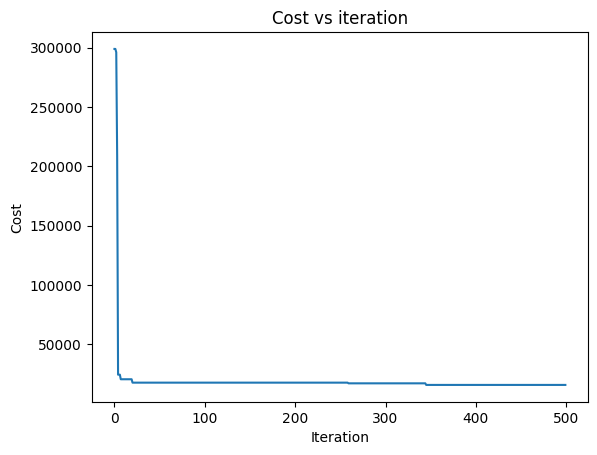

CPU times: user 1.87 s, sys: 113 ms, total: 1.99 s
Wall time: 2.04 s


In [ ]:
%%time
np.random.seed(123)
# Set-up hyperparameters
options = {'c1': 0.25, 'c2': 0.3, 'w':0.90}

# Create bounds
max_bound = 5000 * np.ones(4)
min_bound = 0 * np.ones(4)
bounds = (min_bound, max_bound)
bounds

# Call instance of PSO
optimizer = ps.single.GlobalBestPSO(n_particles=190, dimensions=4, options=options, bounds=bounds)

# Perform optimization
cost, pos = optimizer.optimize(funcrtion, iters=500)
history = optimizer.cost_history


pos = pos.round()
print("Solución de restricciones")
print("Si el valor es positivo, es que se eccedio la restricción")
print("Si el valor es negatiavo, o cero, es que no se eccedió la restricción")
print(contrain_01(*pos), contrain_02(*pos), contrain_03(*pos), contrain_04(*pos),  pos)

print("Valor de la función sin restricciones")
print(function_fitness_2(*pos))


plt.plot(history)
plt.title("Cost vs iteration")
plt.ylabel("Cost")
plt.xlabel("Iteration")
plt.show()

### Función objetivo

$$
\text{max } Z = 3x_1 + 4x_2
$$
Restricciones de actividades:
$$
2x_1 + x_2 \leq 100
$$
$$
x_1 + 3x_2 \leq 90
$$
Restricciones de no negatividad:

$$
x_1 \geq 0
$$
$$
x_2 \geq 0
$$


In [ ]:

def function_fitness(x_1, x_2):
    n = 2*x_1 + x_2 - 100
    if n > 0:
        r_1 = -1*n
    else:
        r_1 = 0
    n_2 = x_1 + 3*x_2 - 90
    if n_2 > 0:
        r_2 = -1*n_2*1e1
    else:
        r_2 = 0

    return -1*(2*x_1 + 4*x_2 + r_1 + r_2)

def function(X):
    i, j = X.shape
    f_x = np.zeros((i))
    for idx in range(i):

        x_1, x_2 = X[idx,:]
        valor_de_funcion = function_fitness(x_1, x_2)
        f_x[idx] = valor_de_funcion
    return f_x

def function_fitness_2(x_1, x_2):

    return 2*x_1 + 4*x_2



2025-04-29 19:37:16,862 - pyswarms.single.global_best - INFO - Optimize for 500 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}
pyswarms.single.global_best: 100%|██████████|500/500, best_cost=-122
2025-04-29 19:37:18,308 - pyswarms.single.global_best - INFO - Optimization finished | best cost: -122.1406004099972, best pos: [54.41194789  7.38020014]


Valor de la función sin restricciones
138.34469632916318


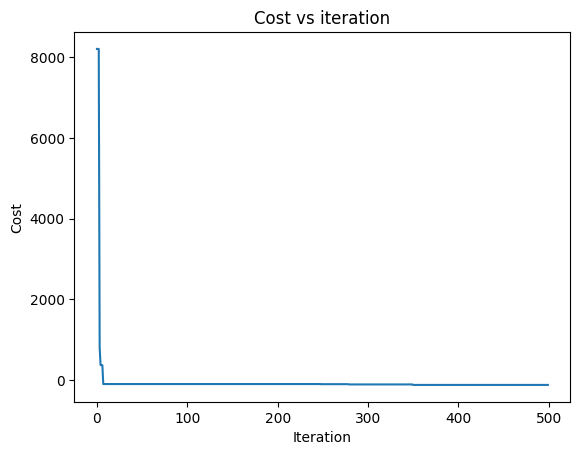

CPU times: user 1.47 s, sys: 87.9 ms, total: 1.56 s
Wall time: 1.6 s


In [ ]:
%%time
np.random.seed(123)
# Set-up hyperparameters
options = {'c1': 0.5, 'c2': 0.3, 'w':0.90}

# Create bounds
max_bound = 5000 * np.ones(2)
min_bound = 0 * np.ones(2)
bounds = (min_bound, max_bound)
bounds

# Call instance of PSO
optimizer = ps.single.GlobalBestPSO(n_particles=190, dimensions=2, options=options, bounds=bounds)

# Perform optimization
cost, pos = optimizer.optimize(function, iters=500)
history = optimizer.cost_history


print("Valor de la función sin restricciones")
print(function_fitness_2(*pos))


plt.plot(history)
plt.title("Cost vs iteration")
plt.ylabel("Cost")
plt.xlabel("Iteration")
plt.show()

In [ ]:
pos[0], pos[1]

(np.float64(54.41194789125012), np.float64(7.380200136665735))

In [ ]:
import numpy as np

X = np.random.rand(2, 4)
X.shape

(2, 4)